# Missing Values analysis in the raw data

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import fastcluster
from sklearn.preprocessing import StandardScaler


In [30]:
## proteins that were secreted in DMSO and Untreated wells


raw_data =  pd.read_csv("./inputs/proteomics_data/raw_concentration.csv", sep=',')

protein_cols = [col for col in raw_data.columns if not col.startswith("Metadata")]




In [31]:
protein_cols = [col for col in raw_data.columns if not col.startswith("Metadata")]

def is_numeric(val):
    try:
        float(val)
        return True
    except:
        return False

def has_numeric_values(df, col):
    return df[col].apply(is_numeric).any()


dmso_rows = raw_data[raw_data["Metadata_Compound"] == "DMSO"]
untreated_rows = raw_data[raw_data["Metadata_Compound"] == "UNTREATED"]

proteins_in_dmso = [col for col in protein_cols if has_numeric_values(dmso_rows, col)]
proteins_in_untreated = [col for col in protein_cols if has_numeric_values(untreated_rows, col)]

print(f"🔹 Number of proteins with at least one numeric value in DMSO wells : {len(proteins_in_dmso)}")
print(f"🔹 Number of proteins with at least one numeric value in Untreated wells : {len(proteins_in_untreated)}")


🔹 Number of proteins with at least one numeric value in DMSO wells : 111
🔹 Number of proteins with at least one numeric value in Untreated wells : 127


In [36]:
## proteins that were secreted only in tested compounds

protein_cols = [col for col in raw_data.columns if not col.startswith("Metadata")]

dmso_untreated = raw_data[raw_data["Metadata_Compound"].isin(["DMSO", "UNTREATED"])]


treated_data = raw_data[~raw_data["Metadata_Compound"].isin(["DMSO", "UNTREATED"])]


detected_in_treated = [
    col for col in protein_cols if pd.to_numeric(treated_data[col], errors='coerce').notna().any()
]


detected_in_dmso_untreated = [
    col for col in protein_cols if pd.to_numeric(dmso_untreated[col], errors='coerce').notna().any()
]


secreted_only_in_compounds = list(set(detected_in_treated) - set(detected_in_dmso_untreated))


print("Nomber of proteins secreted only in tested compounds:", len(secreted_only_in_compounds))
print(secreted_only_in_compounds)



Nomber of proteins secreted only in tested compounds: 81
['Q16552', 'P07196', 'Q14005', 'P11226', 'P01241', 'P39900', 'P04141', 'Q9UNA0', 'P14778', 'O60603', 'P10600', 'P29460', 'P09038', 'P78536', 'Q01638', 'P29459', 'Q9HB29', 'P35225', 'P05937', 'Q92583', 'Q9GZX6', 'P08700', 'Q9NRJ3', 'P25445', 'P13726', 'Q9NPF7', 'P51888', 'P61812', 'P40933.1', 'Q9UK05', 'Q03405', 'P20333', 'Q9H293', 'P42830', 'P60568', 'O75594', 'Q9NPH3', 'P49763', 'Q86WN2', 'O95760', 'Q15848', 'P14210', 'Q15485', 'P10147', 'P55774', 'Q8TAD2', 'P01133', 'Q8NEV9', 'P39905', 'Q9HBE4', 'Q9NNX6', 'Q9UHA7', 'Q15116', 'Q02223', 'P12644', 'P45452', 'P47992', 'Q13291', 'P78423', 'P07333', 'Q6UXB2', 'P26441', 'P09919', 'P01584', 'Q99731', 'O14625', 'P49771', 'O95715', 'Q9Y5W5', 'O43508', 'P20809', 'P02776', 'P12645', 'P15248', 'Q86VB7', 'P48061', 'O95388', 'P05231', 'O14836', 'Q99727', 'P40225']


In [24]:
## download the raw data 

raw_data = pd.read_csv("./inputs/proteomics_data/raw_concentration.csv", sep=',')


In [ ]:
## we remplace the value of ULOD by 99999 in the raw data to calcule the number of missing values

raw_data.replace(">ULOD", 99999, inplace=True)

In [26]:
# protein columns only 

protein_cols = [col for col in raw_data.columns 
                if not str(col).strip().lower().startswith("metadata")]

print("Protein columns", protein_cols)
print("Number of protein columns:", len(protein_cols))

Protein columns ['P08476', 'O14672', 'P78536', 'Q9UKQ2', 'Q13443', 'Q9UHI8', 'Q9UNA0', 'Q15848', 'Q9UNG2', 'Q15389', 'Q9Y5C1', 'Q9BY76', 'O43827', 'P05067', 'O75888', 'P15514', 'Q9Y275', 'Q02223', 'P12643', 'P12645', 'P12644', 'P22004', 'P18075', 'Q9UK05', 'Q96GW7', 'P01031', 'P05937', 'P51671', 'Q99616', 'Q16627', 'Q16663', 'O15467', 'Q92583', 'P55774', 'Q99731', 'P13500', 'P78556', 'O00585', 'P55773', 'O00175', 'O15444', 'Q9Y4X3', 'Q9NRJ3', 'P10147', 'P13236', 'P13501', 'P80098', 'P08571', 'Q86VB7', 'Q9NNX6', 'Q5ZPR3', 'P32970', 'P29965', 'P33681', 'P42081', 'P36222', 'P23946', 'Q9UBD9', 'P26441', 'P02741', 'P78423', 'P09341', 'P02778', 'O14625', 'P48061', 'P48061.1', 'O43927', 'O95715', 'Q9H2A7', 'Q6UXB2', 'P19876', 'P02776', 'P42830', 'P80162', 'P02775', 'Q07325', 'P99999', 'P07585', 'P27487', 'Q93038', 'O00220', 'O75509', 'Q16610', 'P01133', 'P00533', 'P08246', 'P35613', 'P17813', 'P16581', 'P25445', 'P48023', 'Q9UGM5', 'P05230', 'O95750', 'P09038', 'Q9NSA1', 'P08620', 'P10767', '

In [27]:
## counting the missing values in the raw data (LLOD)

def count_non_numeric(col):
    return (~col.astype(str).str.replace(".", "", regex=False).str.isnumeric()).mean() * 100

protein_cols = [col for col in raw_data.columns if not col.startswith("Metadata")]

missing_percent_df = pd.DataFrame(index=protein_cols, columns=raw_data["Metadata_Compound"].unique())

for protein in protein_cols:
    for compound in raw_data["Metadata_Compound"].unique():

        compound_data = raw_data[raw_data["Metadata_Compound"] == compound]
        missing_percent = count_non_numeric(compound_data[protein])
        missing_percent_df.loc[protein, compound] = missing_percent


# dataphrame with the missing values Protein vs Compound
print(missing_percent_df)

       UNTREATED Actinomycin D Bevirimat Ethoxyquin TC-S 7004 Amperozide  \
P08476     100.0         100.0     100.0      100.0     100.0      100.0   
O14672     98.75          95.0     100.0      100.0     100.0      100.0   
P78536     100.0          90.0     100.0      100.0     100.0      100.0   
Q9UKQ2     100.0         100.0     100.0      100.0     100.0      100.0   
Q13443      97.5          85.0     100.0      100.0     100.0      100.0   
...          ...           ...       ...        ...       ...        ...   
Q9Y5W5     100.0          90.0     100.0      100.0     100.0      100.0   
O95388     100.0         100.0     100.0      100.0     100.0       95.0   
P56704     100.0         100.0     100.0      100.0     100.0      100.0   
P41221     96.25         100.0      95.0       95.0     100.0       95.0   
P47992     100.0         100.0     100.0      100.0     100.0      100.0   

       IOPANOIC ACID Treprostinil MILTEFOSINE  Lys05  ...  \
P08476         100.0      

In [11]:
# dataphrame with the missing values Protein vs Compound categories

dmso_samples = ["DMSO"] 
untreated_samples = ["UNTREATED"]  
all_samples = set(missing_percent_df.columns) 
other_compounds = list(all_samples - set(dmso_samples) - set(untreated_samples))

mean_dmso = missing_percent_df[dmso_samples].mean(axis=1)
mean_untreated = missing_percent_df[untreated_samples].mean(axis=1)
mean_other = missing_percent_df[other_compounds].mean(axis=1)

mean_missing_values = pd.DataFrame({
    "Mean_DMSO": mean_dmso,
    "Mean_UNTREATED": mean_untreated,
    "Mean_Other_Compounds": mean_other
})


print(mean_missing_values)

       Mean_DMSO Mean_UNTREATED Mean_Other_Compounds
P08476     100.0          100.0                100.0
O14672     100.0          98.75            99.305556
P78536     100.0          100.0            99.722222
Q9UKQ2     100.0          100.0                100.0
Q13443     100.0           97.5                98.75
...          ...            ...                  ...
Q9Y5W5     100.0          100.0            99.722222
O95388     100.0          100.0            99.722222
P56704     100.0          100.0                100.0
P41221   95.3125          96.25            95.277778
P47992     100.0          100.0            99.236111

[263 rows x 3 columns]


In [28]:
## list of 35 proteins that are fully missing in all compounds

proteins_fully_missing = missing_percent_df.index[(missing_percent_df == 100).all(axis=1)]
print(proteins_fully_missing)

Index(['P08476', 'Q9UKQ2', 'Q9UNG2', 'P12643', 'Q99616', 'O15444', 'P80162',
       'P17813', 'P05230', 'P10767', 'P21781', 'P22607', 'P36888', 'O00182',
       'P01563', 'P01574', 'Q08334', 'Q96PD4', 'Q14116', 'P27930', 'Q8IU54',
       'P01589', 'Q14213', 'P05112', 'P05113', 'P13232', 'P14151', 'P14780',
       'P07204', 'Q02763', 'Q969D9', 'P00749', 'P17948', 'Q9H7M9', 'P56704'],
      dtype='object')


<Figure size 1500x2500 with 0 Axes>

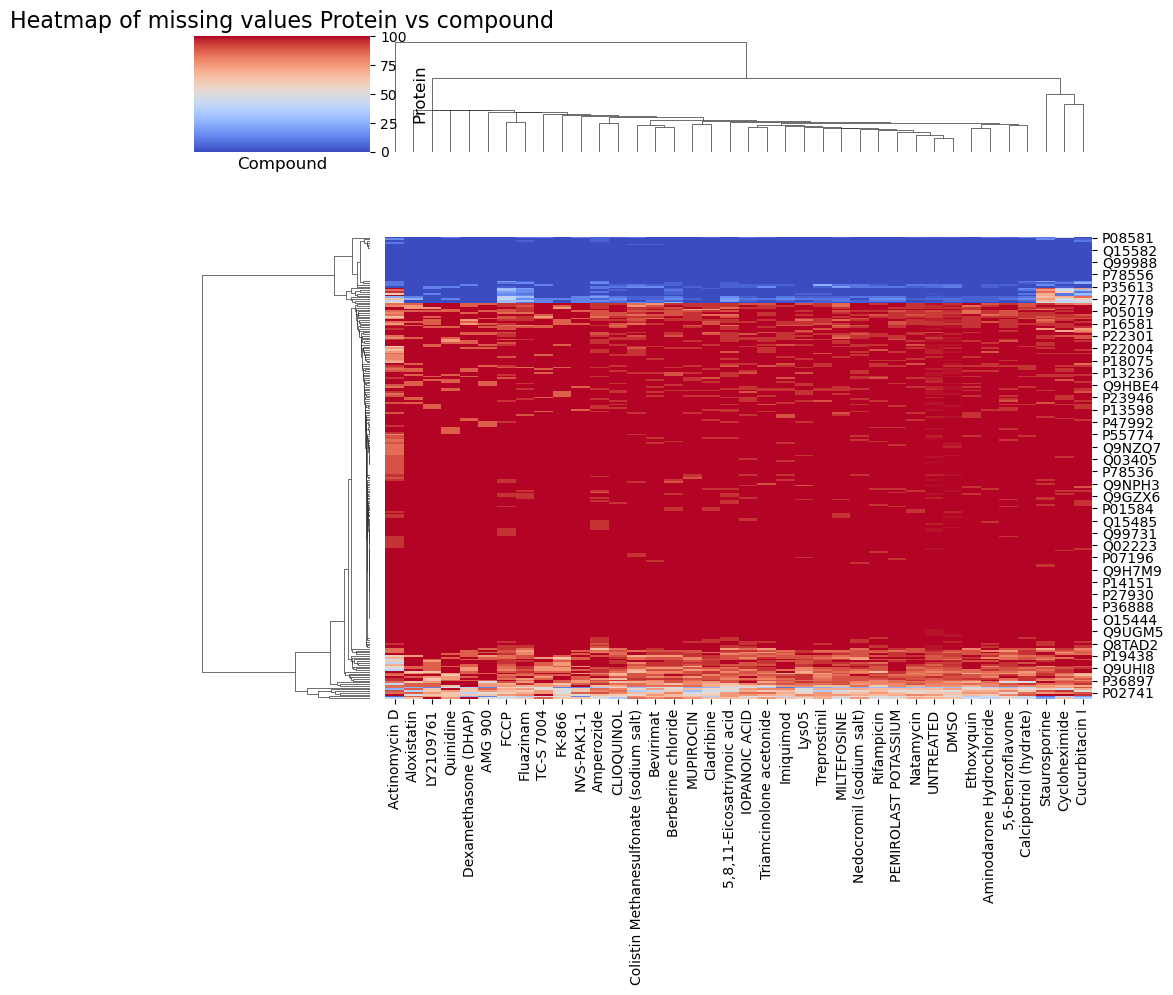

In [13]:
# heatmap of missing values Protein vs Compound

plt.figure(figsize=(15, 25)) 
sns.clustermap(missing_percent_df.astype(float), annot=False, cmap="coolwarm", fmt=".2f", 
            cbar_kws={'label': 'Percentage (%)'})


plt.title("Heatmap of missing values Protein vs compound", fontsize=16)
plt.xlabel("Compound", fontsize=12)
plt.ylabel("Protein", fontsize=12)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

We do the same heatmap of the missing LLOD values for the DMSO data across different wells.

<Figure size 2000x1800 with 0 Axes>

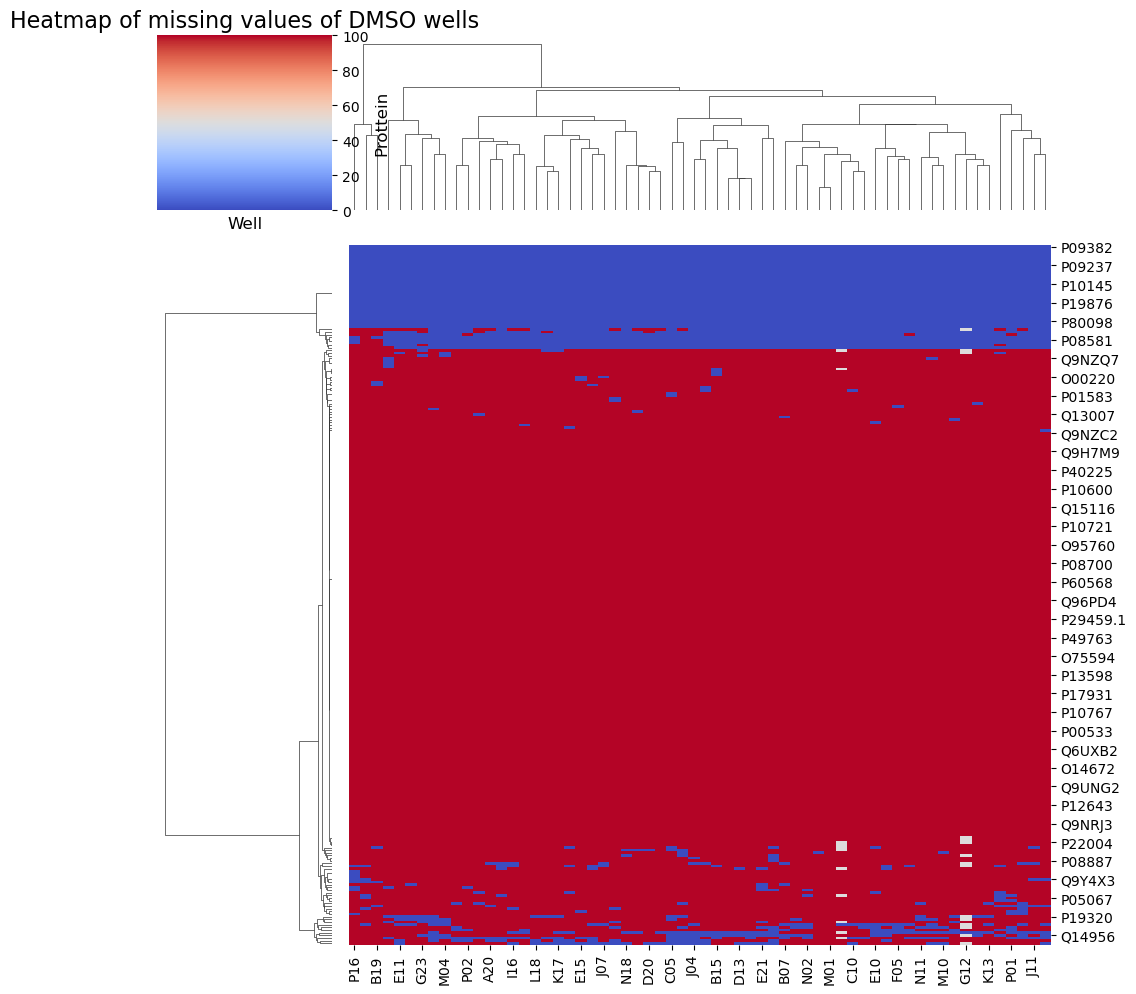

In [14]:
dmso_data = raw_data[raw_data['Metadata_Compound'] == 'DMSO']

proteine_cols = [col for col in dmso_data.columns if not col.startswith("Metadata")]
missing_percent_dmso = pd.DataFrame(index=proteine_cols, columns=dmso_data["Metadata_well_id"].unique())


for protein in proteine_cols:
    for well in dmso_data["Metadata_well_id"]:
       
        well_data = dmso_data[dmso_data["Metadata_well_id"] == well]
     
        non_numeric_percent = (~well_data[protein].astype(str).str.replace(".", "", regex=False).str.isnumeric()).mean() * 100
        missing_percent_dmso.loc[protein, well] = non_numeric_percent

missing_percent_dmso = missing_percent_dmso.astype(float)

plt.figure(figsize=(20, 18))  
sns.clustermap(missing_percent_dmso, annot=False, cmap="coolwarm", 
               method='ward', cbar_kws={'label': 'Percentage(%)'})

plt.title("Heatmap of missing values of DMSO wells", fontsize=16)
plt.xlabel("Well", fontsize=12)
plt.ylabel("Prottein", fontsize=12)
plt.xticks(rotation=45, ha='left')
plt.tight_layout()
plt.show()


## Description of Data

We have a total of 38 compounds, including DMSO and one called Untreated. DMSO has 64 wells across both replicates and Untreated has 80 wells. The most compounds are tested at 10 different concentrations in 2 replicates, while 8 compounds are tested at only one concentration (5.1 µM) in 4 different wells across 2 replicates.
Here is the list of those compounds:

In [15]:
## the list of compound with unique concentration values + DMSO/Untreated with 0uM concentration

single_concentration_compounds = raw_data.groupby('Metadata_Compound')['Metadata_compound_concentration'].nunique()
compounds_with_single_concentration = single_concentration_compounds[single_concentration_compounds == 1].index
filtered_data = raw_data[raw_data['Metadata_Compound'].isin(compounds_with_single_concentration)]

print(compounds_with_single_concentration)


Index(['AMG 900', 'Aloxistatin', 'DMSO', 'Dexamethasone (DHAP)', 'FK-866',
       'LY2109761', 'NVS-PAK1-1', 'Quinidine', 'TC-S 7004', 'UNTREATED'],
      dtype='object', name='Metadata_Compound')


The compound plates are BR00145683 for the first replicate and BR00145686 for the second replicate. All compounds have two replicates. 

The compounds tested at 10 different concentrations (28 in total) in various wells across both plates are:

In [16]:
# filter the data with multiple concentration values
concentration_values = raw_data.groupby('Metadata_Compound')['Metadata_compound_concentration'].unique()
multi_concentration_compounds = concentration_values[concentration_values.apply(len) > 1]

replicate_counts = raw_data.groupby('Metadata_Compound')['Metadata_plate_barcode'].nunique()
print(replicate_counts)

filtered_data = raw_data[raw_data['Metadata_Compound'].isin(multi_concentration_compounds.index)]
print(filtered_data['Metadata_Compound'].unique())
print(filtered_data['Metadata_compound_concentration'].nunique())

Metadata_Compound
5,6-benzoflavone                           2
5,8,11-Eicosatriynoic acid                 2
AMG 900                                    2
Actinomycin D                              2
Aloxistatin                                2
Aminodarone Hydrochloride                  2
Amperozide                                 2
Berberine chloride                         2
Bevirimat                                  2
CLIOQUINOL                                 2
Calcipotriol (hydrate)                     2
Cladribine                                 2
Colistin Methanesulfonate (sodium salt)    2
Cucurbitacin I                             2
Cycloheximide                              2
DMSO                                       2
Dexamethasone (DHAP)                       2
Ethoxyquin                                 2
FCCP                                       2
FK-866                                     2
Fluazinam                                  2
IOPANOIC ACID                        

There are 48 different concentration values in the data, meaning that these 28 compounds are not all tested at the same 10 concentrations.

### Missing values across plates 

We start by calculating the percentage of missing values for each well on each plate. Then, we visualize this using a heatmap to see how missing data is distributed across different plates and wells.

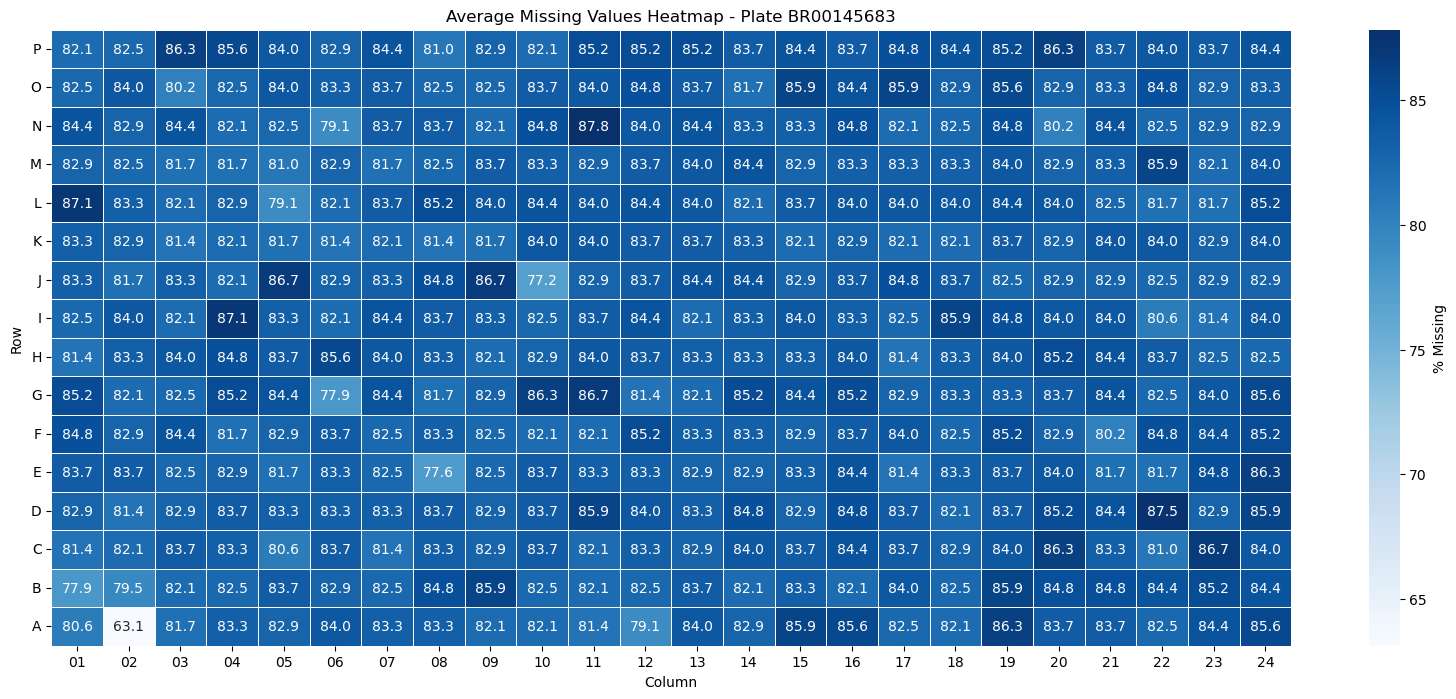

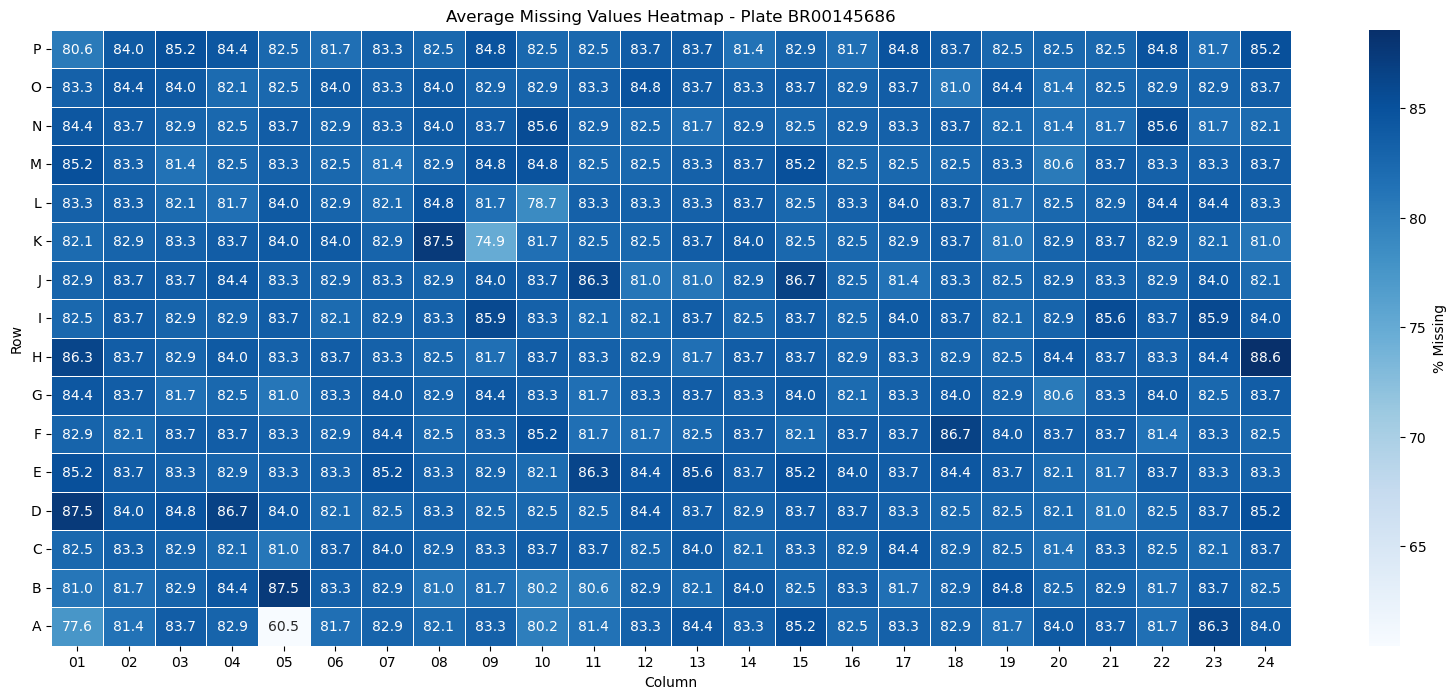

In [17]:
## heatmap of average missing values per well in each plate (replicate)

well_layout = pd.DataFrame(index=[chr(i) for i in range(65, 81)], columns=[str(i).zfill(2) for i in range(1, 25)])

missing_values_well = pd.DataFrame(index=well_layout.index, columns=well_layout.columns)

plates = raw_data["Metadata_plate_barcode"].unique()

for plate in plates:
    
    missing_values_df = pd.DataFrame(index=well_layout.index, columns=well_layout.columns)
    for row in well_layout.index:
        for col in well_layout.columns:
            well_id = f"{row}{col}" 
            well_data = raw_data[(raw_data["Metadata_plate_barcode"] == plate) & (raw_data["Metadata_well_id"] == well_id)]
            
            missing_percent = np.mean([count_non_numeric(well_data[protein]) for protein in protein_cols])
            missing_values_df.loc[row, col] = missing_percent


    missing_values_df = missing_values_df.astype(float)

    plt.figure(figsize=(20, 8))
    sns.heatmap(missing_values_df, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': '% Missing'}, 
                xticklabels=missing_values_df.columns, yticklabels=missing_values_df.index, 
                cbar=True)


    plt.gca().invert_yaxis()
    plt.title(f"Average Missing Values Heatmap - Plate {plate}")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.yticks(rotation=360, ha='right')
    plt.show()

#### Finally we extract the data of proteins that are not fully missing

In [ ]:
# protein columns of normalized signal data and filter the proteins that are fully missing in the raw data

norm_signal = pd.read_csv("./inputs/proteomics_data/normalized_signal.csv", sep=',')

metadata_cols = [col for col in norm_signal.columns if col.startswith("Metadata")]
proteine_data = norm_signal.drop(columns=metadata_cols)


norm_signal_filtered = proteine_data.drop(columns=proteins_fully_missing)

print(norm_signal_filtered.shape)

## filtered data + metadata columns
norm_signal_filtered['Metadata_Plate'] = norm_signal['Metadata_plate_barcode']
norm_signal_filtered['Metadata_Well'] = norm_signal['Metadata_well_id']
norm_signal_filtered['Metadata_Compound'] = norm_signal['Metadata_Compound']
norm_signal_filtered['Metadata_Concentration'] = norm_signal['Metadata_compound_concentration']


(768, 228)


In [ ]:
# adding the metadata categories for each compound

categories = {
    "Positive Control": ["Cucurbitacin I", "5,8,11-Eicosatriynoic acid", "Amperozide", "Staurosporine", 
                          "Ethoxyquin", "Fluazinam", "Cladribine", "Cycloheximide", "Actinomycin D", 
                          "Berberine chloride", "FCCP", "5,6-benzoflavone", "Rifampicin", "Lys05", 
                          "Troglitazone", "Aminodarone Hydrochloride"],
    "Negative Control": ["Treprostinil", "Natamycin", "Imiquimod", "Colistin Methanesulfonate (sodium salt)",
                         "Triamcinolone acetonide", "Nedocromil (sodium salt)", "Calcipotriol (hydrate)", 
                         "MILTEFOSINE", "PEMIROLAST POTASSIUM", "MUPIROCIN", "CLIOQUINOL", "IOPANOIC ACID", 
                         "Bevirimat", "DMSO", "UNTREATED"],
    "JUMP Control": ["AMG 900", "NVS-PAK1-1", "Dexamethasone (DHAP)", "LY2109761", "FK-866", "Quinidine", 
                      "TC-S 7004", "Aloxistatin"]
}

categories_df = pd.DataFrame([(compound, category) for category, compounds in categories.items() for compound in compounds],
                             columns=['Metadata_Compound', 'Metadata_Categories'])

norm_signal_filtered = norm_signal_filtered.merge(categories_df, on='Metadata_Compound', how='left')

print(norm_signal_filtered)

       O14672    P78536    Q13443    Q9UHI8    Q9UNA0    Q15848    Q15389  \
0    0.017423 -0.000964  0.001446  0.004846  0.012545  0.020850  0.116890   
1    0.019469  0.056058  0.046421  0.060157  0.039325  0.013892  0.066089   
2    0.006234  0.014006  0.001218  0.005959  0.005238  0.009237  0.162196   
3    0.001023 -0.010662 -0.003273  0.005323  0.018411  0.012282  0.159211   
4    0.014851 -0.008744 -0.000133 -0.008040 -0.001202  0.018367  0.146334   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.000897 -0.004907 -0.004353  0.013070 -0.000643  0.008503  0.160103   
764 -0.006407  0.008296 -0.008084 -0.003776  0.001816  0.019625  0.174688   
765  0.010908  0.012912 -0.000782 -0.008332  0.001476  0.018248  0.146183   
766  0.016539  0.010962 -0.008323 -0.000783 -0.016789  0.016128  0.154231   
767  0.004684 -0.024501 -0.011446  0.003836 -0.000094  0.002136  0.128419   

       Q9Y5C1    Q9BY76    O43827  ...    P35968    Q9Y5W5    O95388  \
0  

In [ ]:
## data can be directly used for the analysis

# downloading the filtered data 

#norm_signal_filtered.to_csv(f"/Users/grigoryanmariam/newproject/2025_Grigoryan_Proteomics/00.exploratory_analysis/outputs/norm_signal_filtered.csv", index=False)

norm_signal_met = pd.read_csv("./outputs/norm_signal_filtered.csv", sep=',')